# 1. Data Exploration in Python (Loading, View, and Summarize)

Note that we import some of the packages using an alias notation, to make the code more readable.
```
import <package> as <alias>
```
The aliases `np`, `pd`, and `plt` are commonly used in the data science community.

The following statement defines the location of the data files in your file system. Here we assume that the data folder is located in the parent folder of this ipython notebook.

## 2. Import Needed Functionality

In [1]:
# Import necessary libraries for data manipulation, modeling, and plotting

# install dmba package
!pip install dmba
# import the utility function regressionSummary
from dmba import regressionSummary
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split   # For splitting the dataset
from sklearn.metrics import r2_score,mean_squared_error    # For evaluating the model's performance
from sklearn.linear_model import LinearRegression  # For performing linear regression# Linear Regression model
import matplotlib.pyplot as plt     # For plotting actual vs predicted values
#The abbreviations pd, np, and sm are commonly used in the data science community.
help(sklearn)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.1 MB/s eta 0:00:00
Colab environment detected.
Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    dec

## Load Data

In [ ]:
#create a folder with all the data files there and get the path to that folder
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

**Dataset: West Roxbury Housing Data**


    'TOTAL VALUE': 'Total assessed value of the property (in dollars)',
    'TAX': 'Annual property tax (in dollars)',
    'LOT SQFT': 'Lot size in square feet',
    'YR BUILT': 'Year the property was built',
    'GROSS AREA': 'Gross area of the property (in square feet)',
    'LIVING AREA': 'Living area in square feet',
    'FLOORS': 'Number of floors in the property',
    'ROOMS': 'Total number of rooms in the property',
    'BEDROOMS': 'Number of bedrooms in the property',
    'FULL BATH': 'Number of full bathrooms',
    'HALF BATH': 'Number of half bathrooms',
    'KITCHEN': 'Indicates if the property has a kitchen (1 = yes, 0 = no)',
    'FIREPLACE': 'Number of fireplaces in the property',
    'REMODEL': 'Indicates whether the property has been remodeled'

In [ ]:
# Load data int a Pandas Dataframe
housing_df = pd.read_csv(my_drive_path+'WestRoxbury.csv')

# Show the shape (dimensions) of the DataFrame: (number of rows, number of columns)
housing_df.shape

# Display the first 5 rows to get an initial look at the dataset
housing_df.head()  #show the 1st five rows
#print(housing_df)  #show all the data

# In case you want to view all the rows at once, you can adjust the display option:
pd.set_option('display.max_rows', None)
#print(housing_df)


# Print the list of column names to see which variables are present in the dataset
print(housing_df.columns)  # print a list of variables
#it can be tricky to access these columns with spaces. We can edit all
housing_df['TOTAL VALUE '] #you need to add those spaces. The spaces also affect this housing_df.TOTAL VALUE --wont work

# Rename columns: replace spaces with '_' housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
#housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
# this will change all the names of the columns according to this rule
housing_df.columns = [s.strip().replace(' ', '_')  for s in housing_df.columns]

# Print the cleaned column names to verify the changes
print(housing_df.columns)


# Accessing subsets of the data
# Pandas provides two main methods to access rows in a DataFrame: `loc` and `iloc`.
# `loc`: Access rows by label (name or index)
# `iloc`: Access rows by integer positions (numerical index)
# Example: Let's show the first four rows using both methods.

# Using `loc` to show rows 0 to 3 (inclusive)
housing_df.loc[0:3]

# Using `iloc` to show rows 0 to 3 (iloc excludes the last index, so 4 is not included)
housing_df.iloc[0:4]


# There are different ways to access the first 10 values in a column (TOTAL_VALUE)

# Option 1: Using the column name directly and `iloc` to limit rows
housing_df['TOTAL_VALUE'].iloc[0:10]

# Option 2: Using `iloc` first to slice the rows, then selecting the column
housing_df.iloc[0:10]['TOTAL_VALUE']

# Option 3: Using dot notation (only works if the column name has no spaces)
housing_df.iloc[0:10].TOTAL_VALUE


# Accessing specific rows and columns
# Show the fifth row of the first 10 columns in different ways:
housing_df.iloc[4][0:10]  # Method 1: returning a single row as a Series
housing_df.iloc[4, 0:10]  # Method 2: similar but simpler syntax
housing_df.iloc[4:5, 0:10]  # Method 3: using a slice returns a DataFrame (useful if you need a DataFrame, not Series)

# Concatenating multiple columns (including non-consecutive columns)
# Using pd.concat to combine two separate slices of columns (axis=1 means we combine them side by side as columns)
pd.concat([housing_df.iloc[4:6, 0:2], housing_df.iloc[4:6, 4:6]], axis=1)


# Accessing a full column in various ways
housing_df.iloc[:, 0:1]  # Access first column using iloc
housing_df.TOTAL_VALUE  # Dot notation to access TOTAL_VALUE column
housing_df['TOTAL_VALUE'][0:10]  # Access the first 10 rows of the TOTAL_VALUE column

# Basic descriptive statistics

# Find and print the number of rows (length) of the TOTAL_VALUE column
print('Number of rows:', len(housing_df['TOTAL_VALUE']))
# Calculate and print the mean of the TOTAL_VALUE column
print('Mean of TOTAL_VALUE:', housing_df['TOTAL_VALUE'].mean())

# Display a summary of descriptive statistics for all columns (mean, median, std, etc.)
housing_df.describe()

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')
Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')
Number of rows: 5802
Mean of TOTAL_VALUE: 392.6857149258877


,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## Sampling (undersampling or oversampling)

In [ ]:
# Select a random sample of 5 observations from the DataFrame
# This helps us to get a quick look at a subset of the data
print("Random sample of 5 observations:")
print(housing_df.sample(5))

# Oversampling
# The goal of oversampling is to address class imbalances or to emphasize certain observations in the data.
# Here, we are oversampling houses with more than 10 rooms to give them more importance.

# Create a list of weights for each observation based on the number of rooms
# We assign a higher weight (0.9) to houses with more than 10 rooms and a lower weight (0.01) to others
# This effectively means that houses with more than 10 rooms are more likely to be included in the sample
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df['ROOMS']]

print("Weights for each observation:")
print(weights)

# Take a random sample of 5 observations, using the weights to influence the sampling process
# Observations with higher weights are more likely to be selected
print("Oversampled sample of 5 observations with weights:")
print(housing_df.sample(5, weights=weights))


#Other Ways to sample:

# Assuming we have a 'TARGET' (in this case I used ROOMS) column indicating class labels
# Split the data into training and test sets while maintaining the class distribution
train_df, test_df = train_test_split(housing_df, test_size=0.2, stratify=housing_df['ROOMS'])

#note that this simpling is specified in the train_test_split method

print("Training set:")
print(train_df.head())
print("Test set:")
print(test_df.head())

#Group based sampling:
# Example: Sampling 2 observations from each group defined by the number of rooms
grouped_sample = housing_df.groupby('ROOMS').apply(lambda x: x.sample(2))
print("Sampled 2 observations from each group based on the number of rooms:")
print(grouped_sample)

Random sample of 5 observations:
      TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
2460        375.5  4723      6561      1929        2522         1500     2.0   
2236        518.8  6526      8011      1934        3095         1758     2.0   
5077        398.0  5006      6016      1925        3240         1842     2.0   
4458        444.7  5594      8250      1920        2430         1446     2.0   
4926        381.3  4796      5160      1930        2731         1564     2.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
2460      7         3          1          0        1          1     NaN  
2236      7         3          1          1        1          1     Old  
5077      8         4          1          1        1          1     NaN  
4458      8         3          1          1        1          1     NaN  
4926      7         4          1          1        1          0  Recent  
Weights for each observation:
[0.01, 0.01,

## Reviewing Variables

To review each variable's composition in a dataset, you generally want to examine:



1.   Data Types: Understand what type of data each column contains.
2.   Unique Values: Explore the unique values for categorical variables
3.   Statistical Summary: For numerical variables, get summary statistics like mean, median, min, and max.
4.   Missing Values: Check for any missing or NaN values.
5.   Value Counts: For categorical variables, view the distribution of values.


In [ ]:
# 1. Review Data Types
print("Data types of each column:")
print(housing_df.dtypes)

# 2. Explore Unique Values
print("\nUnique values for each column:")
for column in housing_df.columns:
    print(f"\nColumn: {column}")
    print(housing_df[column].unique())


# 3. Statistical Summary
print("\nSummary statistics for numerical columns:")
print(housing_df.describe())

# 4. Check for Missing Values
print("\nMissing values in each column:")
print(housing_df.isnull().sum())

# 5. Value Counts for Categorical Variables
print("\nValue counts for categorical columns:")
for column in housing_df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {column}")
    print(housing_df[column].value_counts())

Data types of each column:
TOTAL_VALUE    float64
TAX              int64
LOT_SQFT         int64
YR_BUILT         int64
GROSS_AREA       int64
LIVING_AREA      int64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

Unique values for each column:

Column: TOTAL_VALUE
[344.2   412.6   330.1   ... 449.    564.    413.414]

Column: TAX
[4330 5190 4152 ... 5476 5648 7095]

Column: LOT_SQFT
[9965 6590 7500 ... 6762 7198 7406]

Column: YR_BUILT
[1880 1945 1890 1957 1910 1950 1954 1958 1900 1960 1889 2004 1940 1875
 1920 1944 1892 1896 1906 1925 1963 1915 1990 1995 1996 1907 1860 1967
 1991 2007 1964 1942 1987 1997 1948 1930 1928 1999 1946 1955 1968 1934
 1983 2001 1962 1956 1959 1969 1989 1965 1974 1972 1971 1970 1978 1984
 2003 1911 1980 2005 1986 2002 1993 1914 1926 1916 1929 1918 1951 1924
 1909 2006 1905 1943 1961 1992 2008 1988 1904 1966 193

**CAN YOU NOTICE ANY ISSUES ON THE RESULT ABOVE???**


1. Data Types
* REMODEL Column: The REMODEL column is of type object, which is expected since it contains categorical data. However, the presence of NaN values indicates that this column is not fully populated.
2. Unique Values
* REMODEL Column: Contains NaN, 'Recent', and 'Old'. This suggests that there are missing values in this column which need to be handled.
3. Summary Statistics
* YR_BUILT Column: There is a 0 value in the YR_BUILT column, which seems out of place as it should represent the year the house was built. This likely indicates an error or missing value.
* FLOORS Column: Contains values 1.0, 1.5, 2.0, 2.5, and 3.0. This is reasonable, but make sure that these values accurately reflect the number of floors in the dataset.
* HALF_BATH Column: Contains values from 0 to 3. The average (0.614) suggests that many houses have zero half baths, which could be verified for consistency.

4. Missing Values
* REMODEL Column: This column has 4346 missing values out of 5802 total rows, which is a significant proportion (about 75%). This might indicate a need for imputation or a decision to exclude this column if it's not crucial.
5. Value Counts for Categorical Columns
* REMODEL Column: The value counts show that 'Recent' is much more common than 'Old', and the large number of missing values should be addressed.

In [ ]:
#an unseen missing data!!!

# Replace '0' in 'YR_BUILT' with NaN
housing_df['YR_BUILT'].replace(0, np.nan, inplace=True)

print(housing_df.REMODEL.unique())
print(housing_df.YR_BUILT.unique())

[nan 'Recent' 'Old']
[1880. 1945. 1890. 1957. 1910. 1950. 1954. 1958. 1900. 1960. 1889. 2004.
 1940. 1875. 1920. 1944. 1892. 1896. 1906. 1925. 1963. 1915. 1990. 1995.
 1996. 1907. 1860. 1967. 1991. 2007. 1964. 1942. 1987. 1997. 1948. 1930.
 1928. 1999. 1946. 1955. 1968. 1934. 1983. 2001. 1962. 1956. 1959. 1969.
 1989. 1965. 1974. 1972. 1971. 1970. 1978. 1984. 2003. 1911. 1980. 2005.
 1986. 2002. 1993. 1914. 1926. 1916. 1929. 1918. 1951. 1924. 1909. 2006.
 1905. 1943. 1961. 1992. 2008. 1988. 1904. 1966. 1938. 1935. 1953. 1798.
 1973. 1949. 1994. 1933. 1912. 1927. 2011. 2000. 1908. 1931. 1921. 1923.
 1975. 1976. 2009. 1902. 1922. 1952. 1939. 1947. 1941. 1883. 1899. 1985.
 1894. 2010. 1895. 1845. 1917. 1850. 1903. 1936. 1981.   nan 1913. 1932.
 1800. 1870. 1998. 1937. 1885. 1820. 1891. 1810. 1863. 1840. 1835. 1901.
 1898. 1881. 1919. 1886. 1888. 1887. 1864. 1851. 1872. 1804. 1877. 1865.
 1897. 1893. 1848. 1874. 1884.]


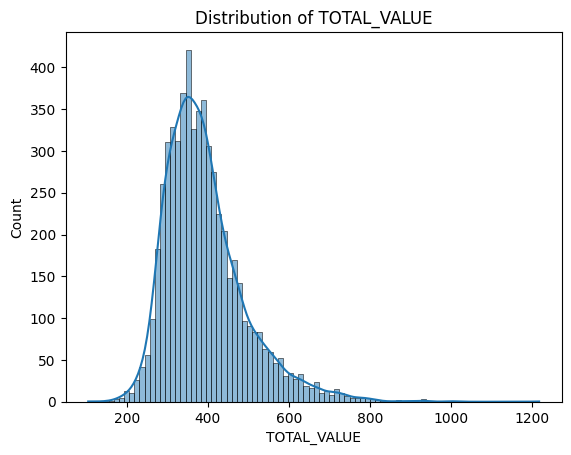

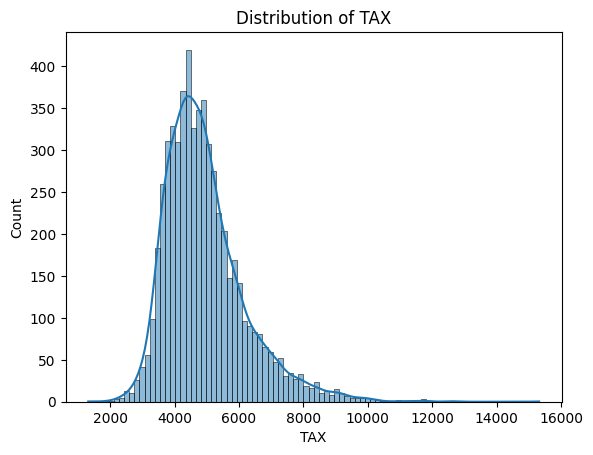

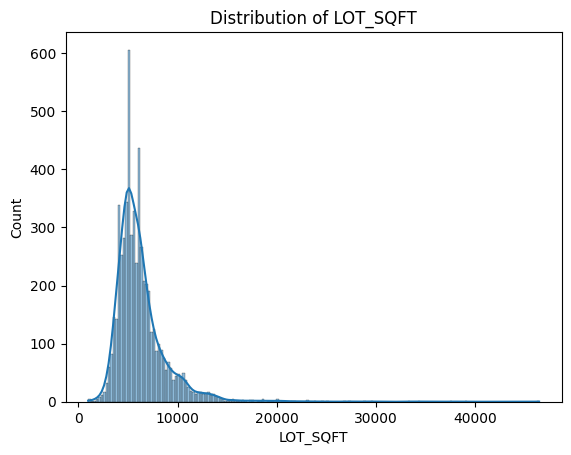

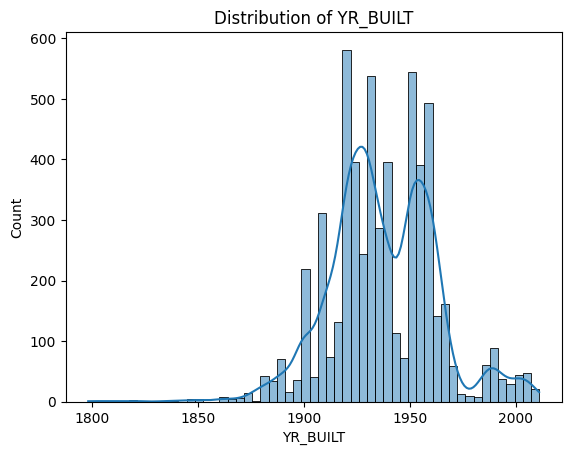

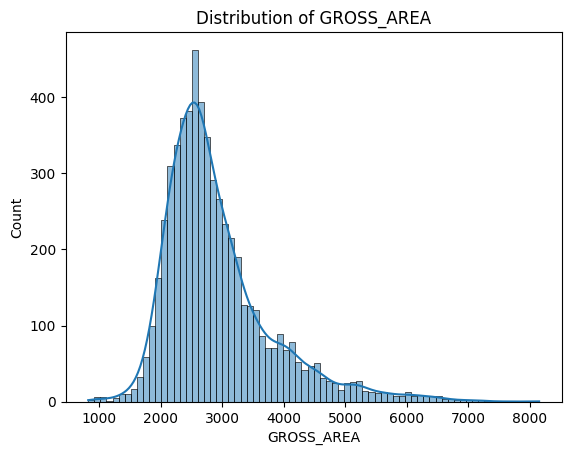

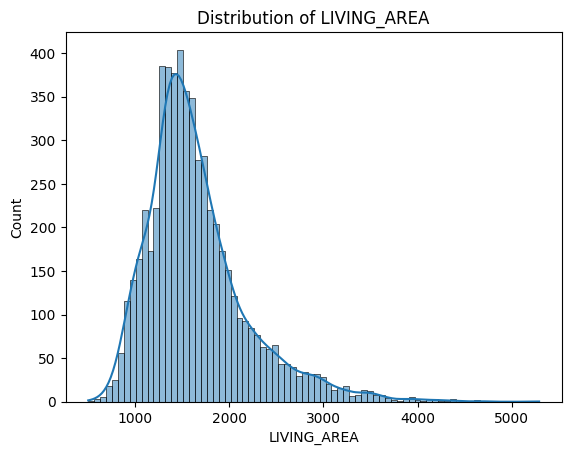

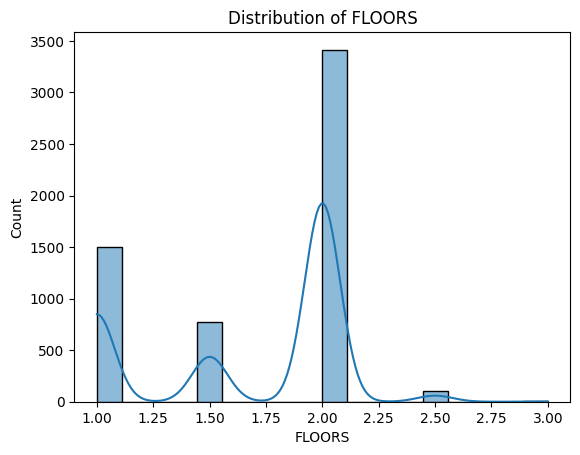

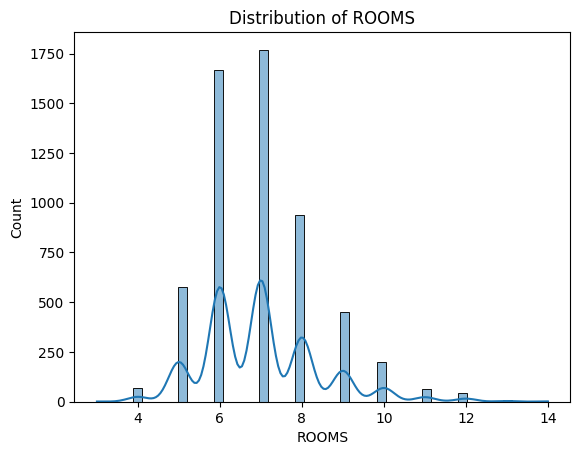

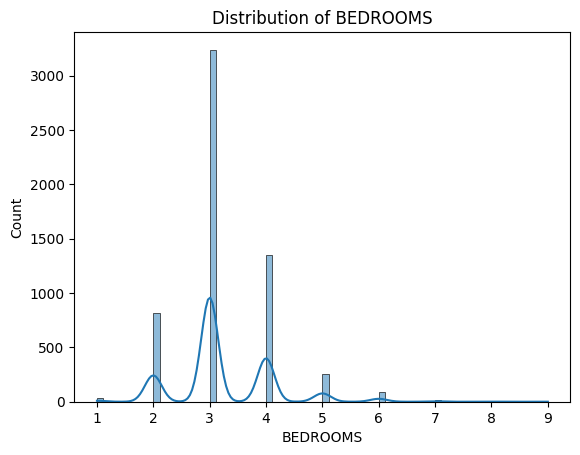

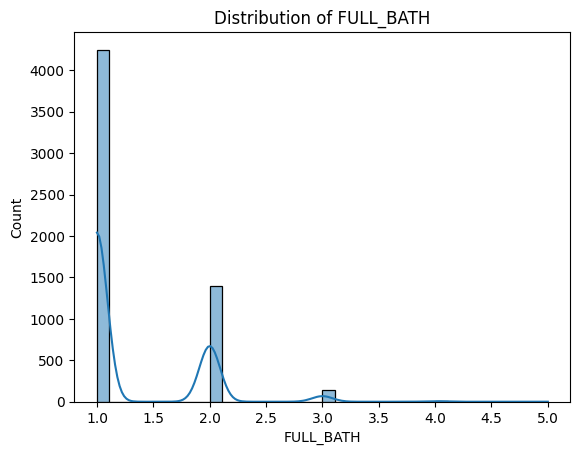

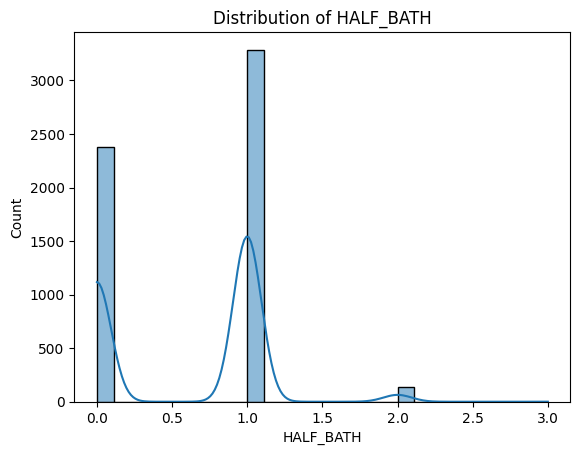

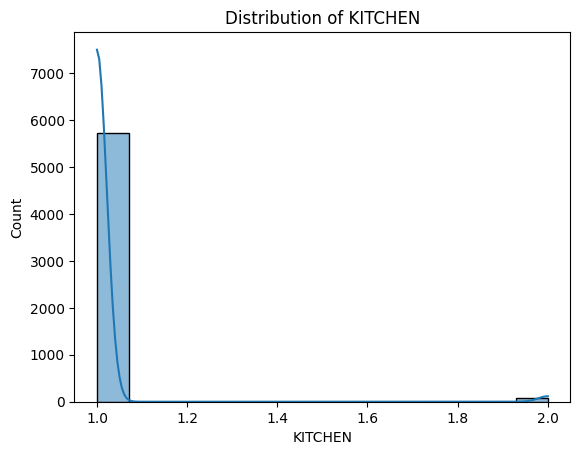

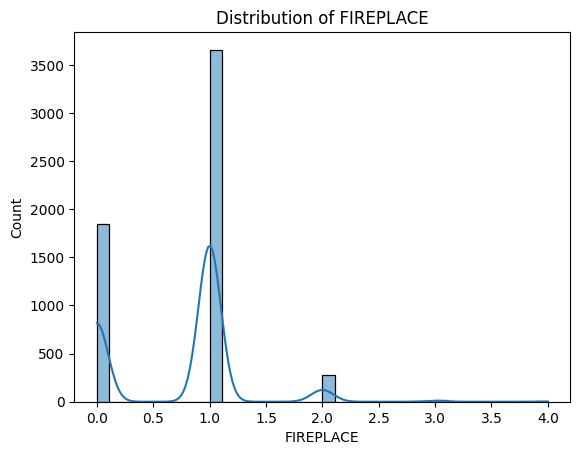

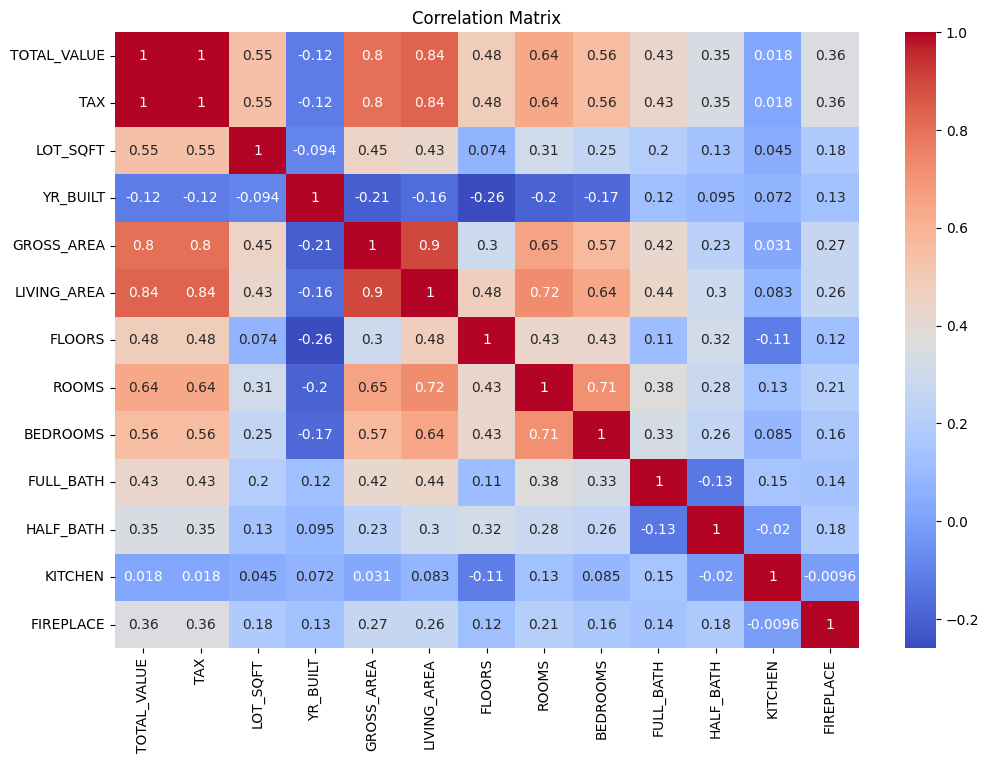

In [ ]:
# Plot distributions of numerical variables
import seaborn as sns

numerical_cols = housing_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(housing_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Explore relationships between 'TOTAL_VALUE' and other numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(housing_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Dealing with missing data


In [ ]:
# Check for NaN values in the entire DataFrame
nan_check = housing_df.isna().sum()
# Display the number of NaN values for each column
print("Number of NaN values in each column:")
print(nan_check)

Number of NaN values in each column:
TOTAL_VALUE       0
TAX               0
LOT_SQFT          0
YR_BUILT          1
GROSS_AREA        0
LIVING_AREA       0
FLOORS            0
ROOMS             0
BEDROOMS          0
FULL_BATH         0
HALF_BATH         0
KITCHEN           0
FIREPLACE         0
REMODEL        4346
dtype: int64


In [ ]:
# To illustrate missing data procedures, we first convert a few entries for  bedrooms to NA's.
# Then we impute these missing values using the median of the remaining values.

missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', housing_df['BEDROOMS'].count())

# remove rows with missing values
#reduced_df = housing_df.dropna()
#print('Number of rows after removing rows with missing values: ', len(reduced_df))


# replace the missing values using the median of the remaining values.
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',housing_df['BEDROOMS'].count())

housing_df['YR_BUILT'].fillna(housing_df['YR_BUILT'].median(), inplace=True)


housing_df['REMODEL'].fillna('None', inplace=True)
print("Missing values after handling:\n", housing_df.isnull().sum())


Number of rows with valid BEDROOMS values after setting to NAN:  5792
Number of rows with valid BEDROOMS values after filling NA values:  5802
Missing values after handling:
 TOTAL_VALUE    0
TAX            0
LOT_SQFT       0
YR_BUILT       0
GROSS_AREA     0
LIVING_AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64


In [ ]:
# Check the current type of the 'REMODEL' column
print(type(housing_df.REMODEL))

# Convert 'REMODEL' to a categorical variable
housing_df.REMODEL = housing_df.REMODEL.astype('category')

# Display the categories of the 'REMODEL' column
print(housing_df.REMODEL.cat.categories)  # Shows the unique categories

# Verify the type of the 'REMODEL' column after conversion
print(housing_df.REMODEL.dtype)  # Should print 'category'

<class 'pandas.core.series.Series'>
Index(['None', 'Old', 'Recent'], dtype='object')
category


## Normalizing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.iloc[:, 0:3].copy()

# StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1.
# This is known as standardization. It assumes that the data follows a normal distribution
# and transforms the data such that it falls within a standard normal distribution (z-score) with values ranging
# approximately between -3 and +3 for most data points. The formula used is:
# z = (x - mean) / standard_deviation
# where 'x' is an individual value, 'mean' is the mean of the column, and 'standard_deviation' is the standard deviation of the column.


# pandas:
norm_df = (df - df.mean())/df.std()
# This manually standardizes the DataFrame by subtracting the mean and dividing by the standard deviation for each column.


# scikit-learn implementation:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), index=df.index,
   columns=df.columns)
# The StandardScaler in scikit-learn automatically performs standardization. It computes the mean and standard deviation,
# then transforms the data accordingly. The result is a numpy array, which we convert back to a DataFrame with the original indices and column names.

print(norm_df.head())


# Rescaling a data frame
#When MinMaxScaler is used the it is also known as Normalization and it transform all
#the values in range between (0 to 1) formula is x = [(value - min)/(Max- Min)]


# scikit-learn implementation:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), index=df.index,
   columns=df.columns)
# The MinMaxScaler in scikit-learn performs normalization automatically. It scales the data based on the minimum and maximum values of each column.
# The result is a numpy array, which we convert back to a DataFrame with the original indices and column names.

print(norm_df.head())

   TOTAL_VALUE       TAX  LOT_SQFT
0    -0.488921 -0.488550  1.381138
1     0.200812  0.200806  0.116845
2    -0.631102 -0.631230  0.457736
3     1.068020  1.068112  2.807634
4    -0.616985 -0.616802 -0.478777
   TOTAL_VALUE       TAX  LOT_SQFT
0     0.214953  0.215015  0.197472
1     0.276420  0.276448  0.123156
2     0.202283  0.202300  0.143194
3     0.353702  0.353740  0.281323
4     0.203541  0.203586  0.088145


## Partitioning the data

In [ ]:
# set random_state for reproducibility
random_state = 1

# Split data into training (60%) and validation (40%)
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=random_state)
print(f"Training data: {len(trainData)} rows")
print(f"Validation data: {len(validData)} rows")

# Split data into training (50%), validation (30%), and test (20%)
trainData, temp = train_test_split(housing_df, test_size=0.50, random_state=random_state)
validData, testData = train_test_split(temp, test_size=0.40, random_state=random_state)
print(f"Training data: {len(trainData)} rows")
print(f"Validation data: {len(validData)} rows")
print(f"Test data: {len(testData)} rows")

Training data: 3481 rows
Validation data: 2321 rows
Training data: 2901 rows
Validation data: 1740 rows
Test data: 1161 rows


# EXAMPLE - Linear Regression: West Roxbury Housing Data

## 1. Data Prep

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
housing_df = pd.read_csv(my_drive_path + 'WestRoxbury.csv')

# Clean column names:
# - Strip leading/trailing whitespace
# - Convert to lowercase for consistency
# - Replace spaces with underscores for easier access
housing_df.columns = [s.strip().lower().replace(' ', '_') for s in housing_df.columns]

# Check for missing values in the dataset before handling them
print("Missing values before handling:\n", housing_df.isnull().sum())

# Handle missing values:
# Here we are filling the nan values in the Remodel with None
# Alternatively, we drop any rows with missing values.
#housing_df = housing_df.dropna()  # Drop rows with missing values
# OR you could use imputation methods (like filling with mean/median).


housing_df['remodel'].fillna('None', inplace=True)
print("Missing values after handling:\n", housing_df.isnull().sum())


# Create dummy variables for categorical features:
# This converts categorical variables into a format that can be provided to ML algorithms.
# `drop_first=True` avoids multicollinearity by dropping the first category.
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)


# Display info about the changes
print("\nDataset info after handling missing values:")
housing_df.info()

Missing values before handling:
 total_value       0
tax               0
lot_sqft          0
yr_built          0
gross_area        0
living_area       0
floors            0
rooms             0
bedrooms          0
full_bath         0
half_bath         0
kitchen           0
fireplace         0
remodel        4346
dtype: int64
Missing values after handling:
 total_value    0
tax            0
lot_sqft       0
yr_built       0
gross_area     0
living_area    0
floors         0
rooms          0
bedrooms       0
full_bath      0
half_bath      0
kitchen        0
fireplace      0
remodel        0
dtype: int64

Dataset info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_value     5802 non-null   float64
 1   tax             5802 non-null   int64  
 2   lot_sqft        5802 non-null   int64  
 3   yr_built 

## 2. Data Partitioning

   lot_sqft  yr_built  gross_area  living_area  floors  rooms  bedrooms  \
0      9965      1880        2436         1352     2.0      6         3   
1      6590      1945        3108         1976     2.0     10         4   
2      7500      1890        2294         1371     2.0      8         4   
3     13773      1957        5032         2608     1.0      9         5   
4      5000      1910        2370         1438     2.0      7         3   

   full_bath  half_bath  kitchen  fireplace  remodel_Old  remodel_Recent  
0          1          1        1          0        False           False  
1          2          1        1          0        False            True  
2          1          1        1          0        False           False  
3          1          1        1          1        False           False  
4          2          0        1          0        False           False  
0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
Name: total_value, dtype: float64
Shape of t

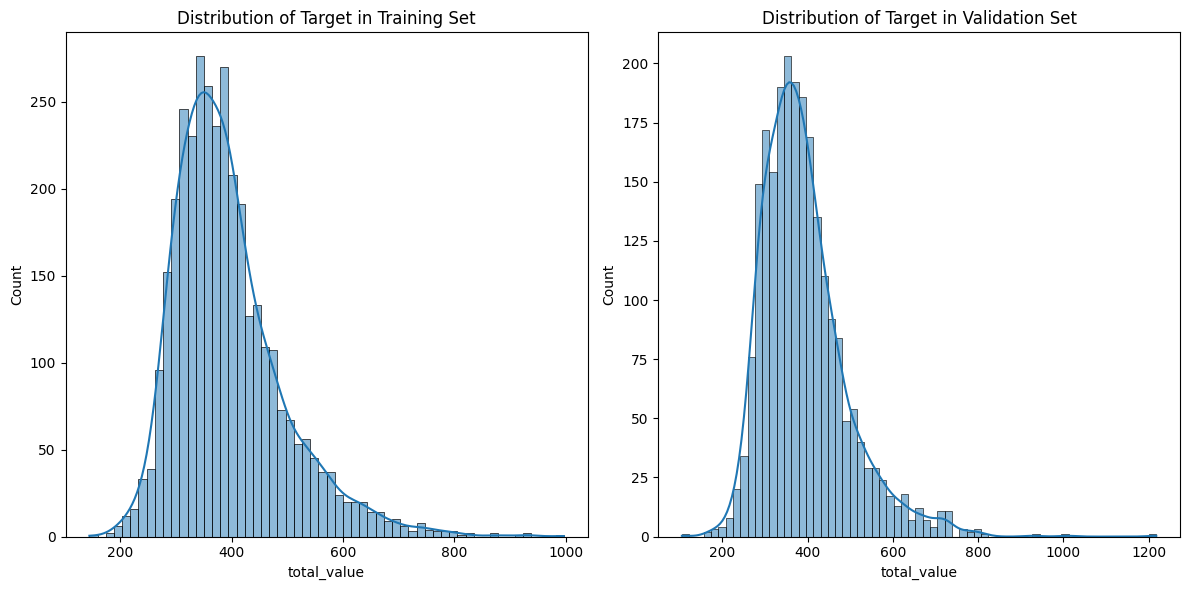

No data leakage detected between train and validation sets.


In [ ]:
# Define predictors and outcome:
# Exclude specified columns from predictors.
exclude_columns = ('total_value', 'tax')  # Columns we don't want to use as predictors
predictors = [col for col in housing_df.columns if col not in exclude_columns]  # List of predictor variables
outcome = 'total_value'  # The target variable we want to predict


# Create X and y
X = housing_df[predictors]
y = housing_df[outcome]

print(X.head())
print(y.head())

# Split the data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Print the shapes of the resulting datasets
print("Shape of training features:", train_X.shape)
print("Shape of training target:", train_y.shape)
print("Shape of validation features:", valid_X.shape)
print("Shape of validation target:", valid_y.shape)


# Visualize the distribution of the target variable in both sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_y, kde=True)
plt.title("Distribution of Target in Training Set")
plt.xlabel(outcome)

plt.subplot(1, 2, 2)
sns.histplot(valid_y, kde=True)
plt.title("Distribution of Target in Validation Set")
plt.xlabel(outcome)

plt.tight_layout()
plt.show()

# Check for any data leakage
common_indices = set(train_X.index) & set(valid_X.index)
if common_indices:
    print("Warning: There are common indices in train and validation sets!")
    print("Common indices:", common_indices)
else:
    print("No data leakage detected between train and validation sets.")

# Optional: Stratified split for imbalanced datasets
# If the target variable is categorical and imbalanced, consider using stratified split
if y.dtype == 'object' or y.nunique() < 10:
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)
    print("\nUsing stratified split due to categorical or imbalanced target variable.")

## 3. Fit Model and Make Predictions (Training Data)

In [ ]:
#Initialize and fit the model
model = LinearRegression()
model.fit(train_X, train_y)

# Make predictions on training and validation sets
train_pred = model.predict(train_X)
valid_pred = model.predict(valid_X)

# Create DataFrames with results
train_results = pd.DataFrame({'Actual': train_y, 'Predicted': train_pred})
train_results['Residual'] = train_results['Actual'] - train_results['Predicted']

valid_results = pd.DataFrame({'Actual': valid_y, 'Predicted': valid_pred})
valid_results['Residual'] = valid_results['Actual'] - valid_results['Predicted']

# Display sample of predictions
print("Sample of training predictions:")
print(train_results.head())

print("\nSample of validation predictions:")
print(valid_results.head())

Sample of training predictions:
      Actual   Predicted   Residual
2024   392.0  387.726258   4.273742
5140   476.3  430.785540  45.514460
5259   367.4  384.042952 -16.642952
421    350.3  369.005551 -18.705551
1401   348.1  314.725722  33.374278

Sample of validation predictions:
      Actual   Predicted   Residual
1822   462.0  406.946377  55.053623
1998   370.4  362.888928   7.511072
5126   407.4  390.287208  17.112792
808    316.1  382.470203 -66.370203
4034   393.2  434.334998 -41.134998



Training set metrics:
Mean Squared Error: 1851.63
Root Mean Squared Error: 43.03
R-squared Score: 0.8097

Validation set metrics:
Mean Squared Error: 1825.79
Root Mean Squared Error: 42.73
R-squared Score: 0.8171


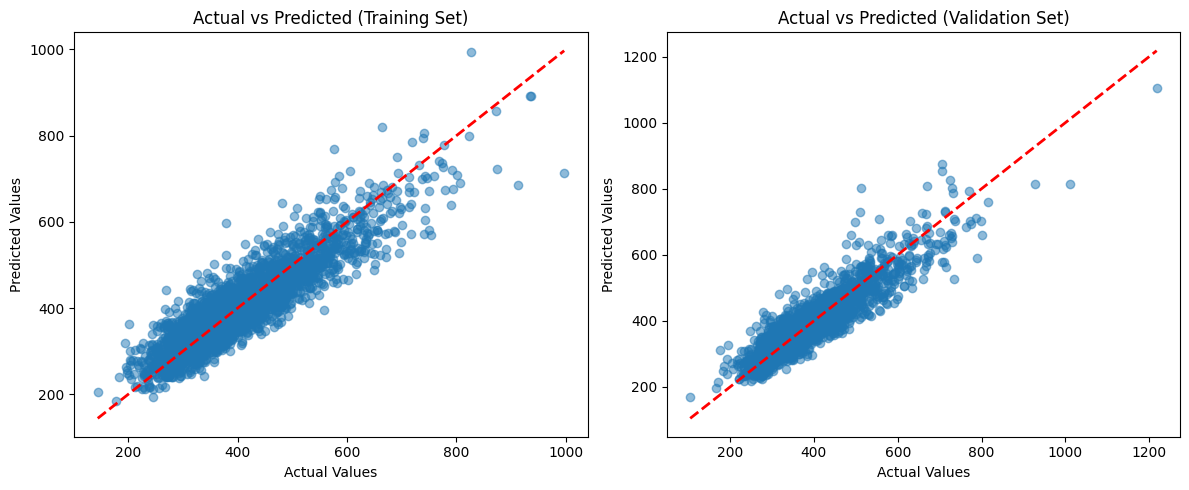

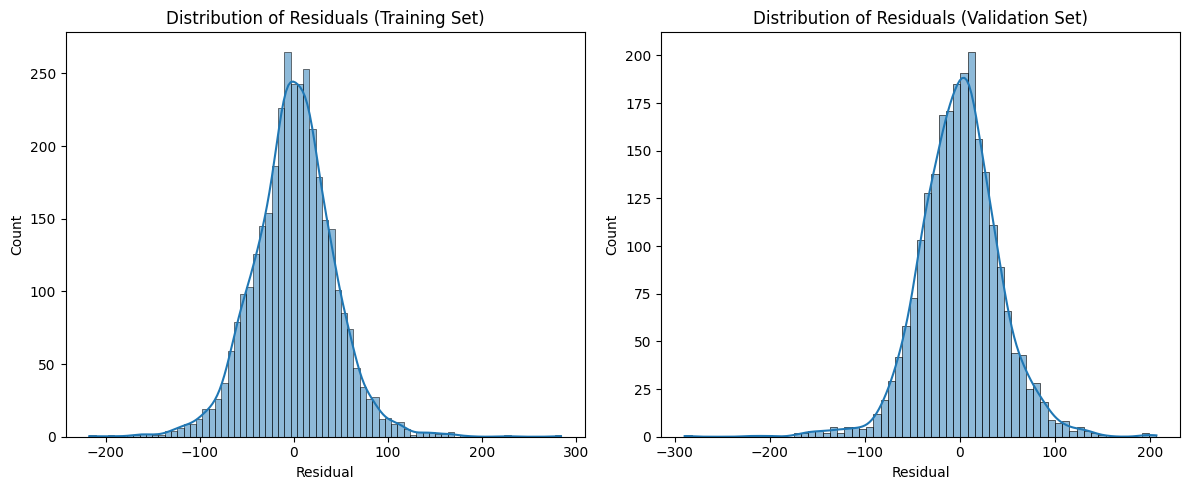


Top 10 most important features:
           Feature  Coefficient
4           floors    39.428693
12  remodel_Recent    23.140168
7        full_bath    19.722302
8        half_bath    18.265462
10       fireplace    18.155437
9          kitchen   -12.766156
11     remodel_Old     4.593192
6         bedrooms    -4.194431
5            rooms     1.164443
3      living_area     0.053637


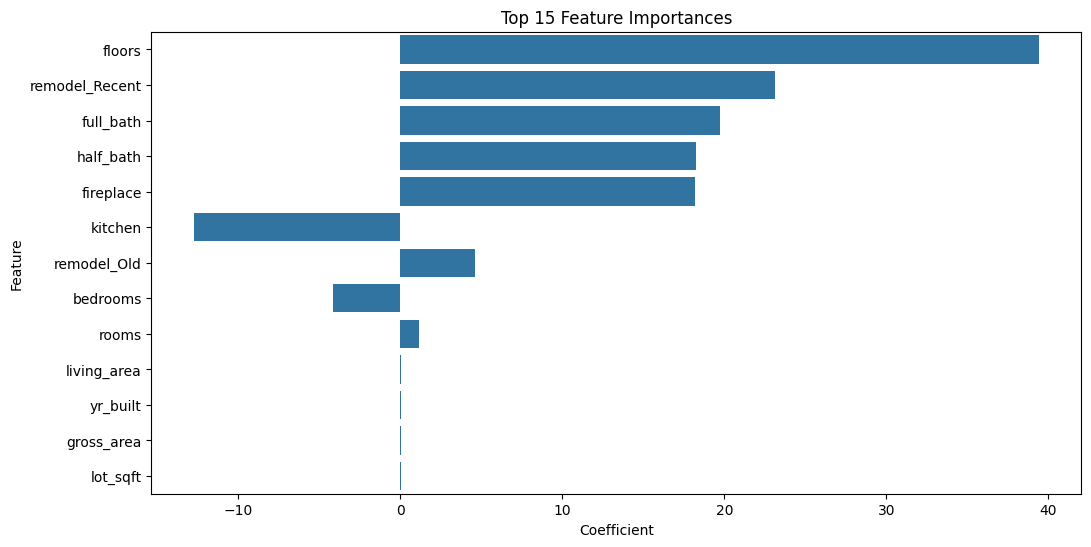

In [ ]:

# Calculate and display performance metrics
def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} set metrics:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")

print_metrics(train_y, train_pred, "Training")
print_metrics(valid_y, valid_pred, "Validation")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_y, train_pred, alpha=0.5)
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Training Set)")

plt.subplot(1, 2, 2)
plt.scatter(valid_y, valid_pred, alpha=0.5)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Validation Set)")

plt.tight_layout()
plt.show()

# Visualize residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_results['Residual'], kde=True)
plt.title("Distribution of Residuals (Training Set)")
plt.xlabel("Residual")

plt.subplot(1, 2, 2)
sns.histplot(valid_results['Residual'], kde=True)
plt.title("Distribution of Residuals (Validation Set)")
plt.xlabel("Residual")

plt.tight_layout()
plt.show()

# Display feature importance
feature_importance = pd.DataFrame({'Feature': train_X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(15))
plt.title("Top 15 Feature Importances")
plt.show()

# What can we constitute from the feature importance???

* Structural features like **number of floors and bathrooms** have the strongest positive relationships with total value.
* **Recent remodeling** significantly increases a property's value.
* Some counterintuitive relationships **(like with kitchens and bedrooms)** might warrant further investigation. They could be due to interactions between variables or could be capturing some other underlying factors.
* The importance of recent remodeling over old remodeling shows that the age and condition of improvements matter.

## 4. Scoring the validation data

In [ ]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'Actual': valid_y,
    'Predicted': valid_pred,
    'Residual': valid_y - valid_pred})
valid_results.head()

,Actual,Predicted,Residual
1822,462.0,406.946377,55.053623
1998,370.4,362.888928,7.511072
5126,407.4,390.287208,17.112792
808,316.1,382.470203,-66.370203
4034,393.2,434.334998,-41.134998


## 5. Assess Accuracy

In [ ]:


# training set
regressionSummary(train_results.Actual, train_results.Predicted)

# validation set
regressionSummary(valid_results.Actual, valid_results.Predicted)



Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886

Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


## 6. Predict New Data

In [ ]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})

# Convert column names to lowercase
new_data.columns = new_data.columns.str.lower()

print(new_data)

# Make sure the model's feature names are also in lowercase
model.feature_names_in_ = [name.lower() for name in model.feature_names_in_]

print('Predictions: ', model.predict(new_data))

   lot_sqft  yr_built  gross_area  living_area  floors  rooms  bedrooms  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   full_bath  half_bath  kitchen  fireplace  remodel_old  remodel_recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.47210285 378.06696706 386.01773842]
